## For the top 5 genes look at all missense mutations vs hotspot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats.multitest
import operator

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
cptac warning: Your version of cptac (0.8.0) is out-of-date. Latest is 0.8.1. Please run 'pip install --upgrade cptac' to update it. (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 10)


In [2]:
en = cptac.Endometrial()
br = cptac.Brca()
cl = cptac.Colon()

In [13]:
gene = 'OXSM'

In [4]:
# get mutation from PIK3CA
mut = br.get_genotype_all_vars("PIK3CA")
mut = mut.drop(columns=["Location", "Mutation_Status"])
mut = mut.loc[(mut['Mutation']=="Missense_Mutation") |( mut["Mutation"]=="Wildtype_Tumor")]
mut

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


Name,Mutation
Patient_ID,
CPT001846,Missense_Mutation
X01BR001,Wildtype_Tumor
X01BR008,Wildtype_Tumor
X01BR020,Wildtype_Tumor
X01BR023,Wildtype_Tumor
...,...
X20BR008,Missense_Mutation
X21BR002,Missense_Mutation
X21BR010,Missense_Mutation


In [5]:
#get the proteomics for the gene we want
proteomics = br.get_proteomics(tissue_type="tumor")
prot = proteomics.loc[:,proteomics.columns.get_level_values('Name').str.contains(gene)]
len(prot.columns.get_level_values('Name'))

prot = cptac.utils.reduce_multiindex(prot, levels_to_drop="Database_ID")
prot.head()

Name,OXSM
CPT000814,1.3597
CPT001846,-1.2018
X01BR001,1.3707
X01BR008,0.4343
X01BR009,1.0194


In [6]:
wildtype  = mut.join(prot)
wildtype = wildtype.loc[wildtype['Mutation']=="Wildtype_Tumor"]
wildtype['type'] = "wildtype_tumor"
# wildtype

In [7]:
#get hotspot mutations
allsnps = mut.join(prot)
allsnps = allsnps.loc[allsnps['Mutation']=="Missense_Mutation"]
allsnps['type'] = "all_snps"
# allsnps

In [8]:
mut_type = br.get_genotype_all_vars("PIK3CA")
joined = mut_type.join(prot)

#select samples containing hotspot mutations
br_hotspot_df = joined[joined.Location.str.contains('E542K') | 
                    joined.Location.str.contains('E545K')|
                      joined.Location.str.contains('H1047R')]


all_hotspots = br_hotspot_df.drop(columns=['Location','Mutation_Status'])
all_hotspots["type"] = "all_hotspots"
# all_hotspots

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


In [9]:
#get hotspot mutations
mut_type = br.get_genotype_all_vars("PIK3CA")
joined = mut_type.join(prot)

#select samples containing hotspot mutations
br_hotspot_df = joined[joined.Location.str.contains('E542K') | 
                    joined.Location.str.contains('E545K')]


brca_hotspot_helical = br_hotspot_df.drop(columns=['Location','Mutation_Status'])
brca_hotspot_helical["type"] = "helical"
# brca_hotspot_helical

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


In [10]:
#get hotspot mutations
mut_type = br.get_genotype_all_vars("PIK3CA")
joined = mut_type.join(prot)

#select samples containing hotspot mutations
br_hotspot_df = joined[joined.Location.str.contains('H1047R')]


#join wildtype proteomics to missense mutation proteomics 
brca_hotspot_kinase = br_hotspot_df.drop(columns=['Location','Mutation_Status'])
brca_hotspot_kinase["type"] = "kinase"
# brca_hotspot_kinase

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 311)


In [11]:
#make the all missense vs hotspots dataframe plot
all_vs_hot =  pd.concat([wildtype, allsnps])
all_vs_hot =  pd.concat([all_vs_hot, all_hotspots])

with_split = pd.concat([all_vs_hot, brca_hotspot_kinase])
with_split = pd.concat([with_split, brca_hotspot_helical])
# all_vs_hot

In [14]:
df

Name,Mutation,OXSM,type
Patient_ID,,,
X01BR001,Wildtype_Tumor,1.3707,wildtype_tumor
X01BR008,Wildtype_Tumor,0.4343,wildtype_tumor
X01BR020,Wildtype_Tumor,-1.7662,wildtype_tumor
X01BR023,Wildtype_Tumor,-0.0964,wildtype_tumor
X01BR026,Wildtype_Tumor,-0.1597,wildtype_tumor
...,...,...,...
CPT001846,Missense_Mutation,-1.2018,helical
X11BR014,Missense_Mutation,-1.0742,helical
X18BR003,Missense_Mutation,-0.9206,helical


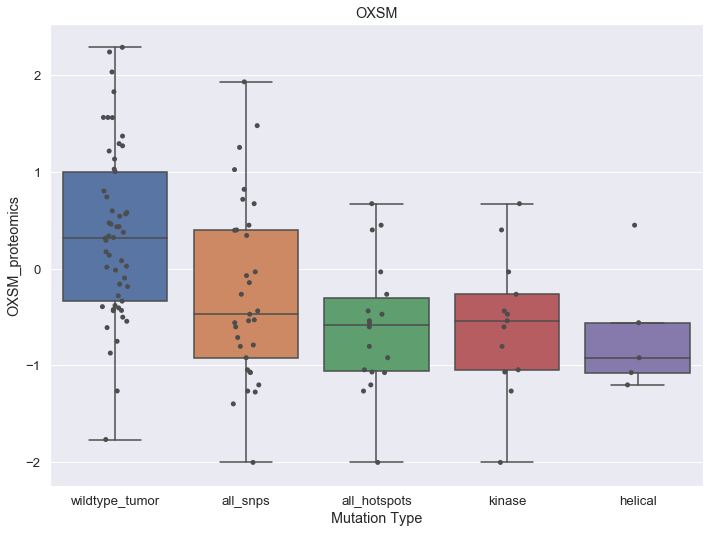

In [12]:
df = with_split
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='type', y=gene, data = df, showfliers = False)  

boxplot.set_title(gene)

boxplot = sns.stripplot(x='type', y=gene, data = df, jitter = True, 
                           color = ".3", dodge = True)

boxplot.set(xlabel = "Mutation Type", ylabel = gene+"_proteomics")


plt.show()
plt.clf()
plt.close()